In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/siic-melanoma-384x384-test/test/ISIC_2417927.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_2227618.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_7969975.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_3356592.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_8170270.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_2799021.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_4693305.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_3783148.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_9729657.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_1792101.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_4629020.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_3451012.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_2416262.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_8976168.jpg
/kaggle/input/siic-melanoma-384x384-test/test/ISIC_4000

In [71]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import gc
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
from skimage import data, io

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [72]:
!pip install scikit-image --upgrade-strategy only-if-needed

In [73]:
!pip install "dask[complete]"

In [74]:
!pip install dask_image

In [75]:
import dask_image.imread
import dask_image.ndfilters
import dask_image.ndmeasure
import dask.array as da

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
!mkdir temp

mkdir: cannot create directory ‘temp’: File exists


In [78]:
!mkdir temp-test
!mkdir temp-train

mkdir: cannot create directory ‘temp-test’: File exists
mkdir: cannot create directory ‘temp-train’: File exists


In [79]:

import os
filename_pattern1 = os.path.join('temp-test', '/kaggle/input/siic-melanoma-384x384-test/test/ISIC_*.jpg')
isic_test = dask_image.imread.imread(filename_pattern1)
print(isic_test)

filename_pattern2 = os.path.join('temp-train', '/kaggle/input/siic-melanoma-384x384-test/train/ISIC_*.jpg')
isic_train = dask_image.imread.imread(filename_pattern2)
print(isic_train)

dask.array<_map_read_frame, shape=(10982, 768, 768, 3), dtype=uint8, chunksize=(1, 768, 768, 3), chunktype=numpy.ndarray>
dask.array<_map_read_frame, shape=(33126, 768, 768, 3), dtype=uint8, chunksize=(1, 768, 768, 3), chunktype=numpy.ndarray>


In [80]:
import os
filename_pattern = os.path.join('temp', '/kaggle/input/siic-melanoma-384x384-test/train/ISIC_*.jpg')
isic_images = dask_image.imread.imread(filename_pattern)
print(isic_images)

dask.array<_map_read_frame, shape=(33126, 768, 768, 3), dtype=uint8, chunksize=(1, 768, 768, 3), chunktype=numpy.ndarray>


In [81]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

**Taking a bitchunk of the images and analysing it**

Splitting one of the isic image into 4 non-overlapping tiles for segmentation purpose


In [82]:
from PIL import Image
pixels = []
i = Image.open("/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg").convert("LA") 
p = i.load()
for b in range(4):
    block = []
    for x in range(32):
        for y in range(32):
            block.append(p[x,y][0])
            
            
    #do something with the pixels from the block

In [83]:
from PIL import Image
  
def main():
    try:
        #Relative Path
        img = Image.open("/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg") 
          
        #splitting the image
        print (img.split)
    except IOError:
        pass
  
if __name__ == "__main__":
    main()

<bound method Image.split of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x768 at 0x7F376D30A650>>


In [84]:
from PIL import Image
  
# opening a multiband image (RGB specifically)
im = Image.open(r"/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg")
  
# split() method
# this will split the image in individual bands
# and return a tuple
im1 = Image.Image.split(im)
  
# showing each band
im1[0].show()
im1[1].show()
im1[2].show()

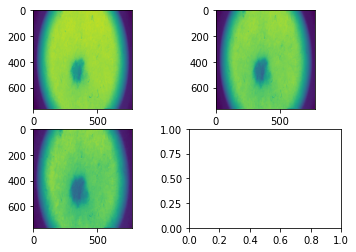

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(im1[0])
ax[0,1].imshow(im1[1])
ax[1,0].imshow(im1[2])
plt.show()


In [86]:
from skimage import data
from skimage import color
from skimage.util import view_as_blocks

# get astronaut from skimage.data in grayscale
l = color.rgb2gray(data.astronaut())

# size of blocks
block_shape = (4, 4)

# see astronaut as a matrix of blocks (of shape block_shape)
view = view_as_blocks(l, block_shape)

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

print(flatten_view.shape)

(128, 128, 16)


In [87]:
!mkdir temp-tiles1

mkdir: cannot create directory ‘temp-tiles1’: File exists


In [88]:
mkdir temp-tiles

mkdir: cannot create directory ‘temp-tiles’: File exists


In [89]:
!ls temp-tiles

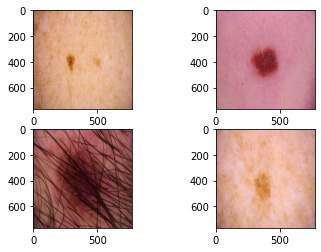

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(isic_images[0])
ax[0,1].imshow(isic_images[1])
ax[1,0].imshow(isic_images[2])
ax[1,1].imshow(isic_images[3])
plt.show()

In [91]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

In [92]:
import os
filename = os.path.join('temp-tiles', '/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')
print(filename)

/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg


dask.array<_map_read_frame, shape=(1, 768, 768, 3), dtype=uint8, chunksize=(1, 768, 768, 3), chunktype=numpy.ndarray>


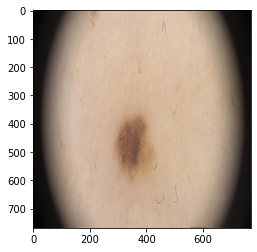

In [93]:
isic_test = dask_image.imread.imread(filename)
print(isic_test)
plt.imshow(isic_test[0, ...])

dask.array<add, shape=(1, 768, 768), dtype=float64, chunksize=(1, 768, 768), chunktype=numpy.ndarray>


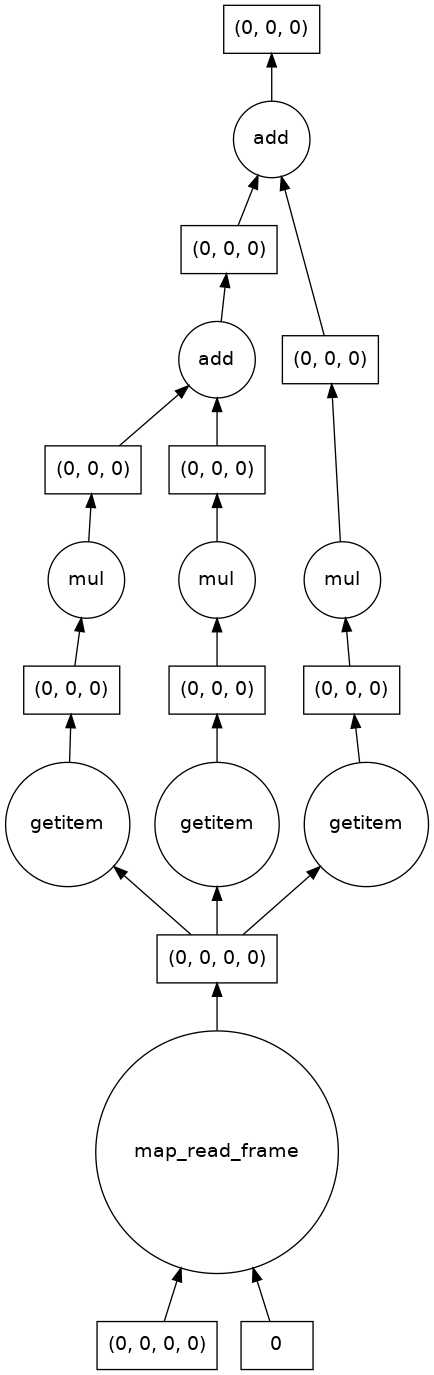

In [94]:
single_image_result = grayscale(isic_test)
print(single_image_result)
single_image_result.visualize()

Original image dimensions:  (1, 768, 768, 3)
Processed image dimensions: (1, 768, 768)


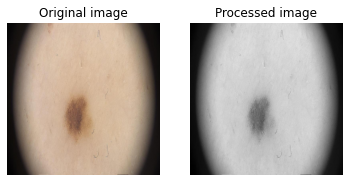

In [95]:
print("Original image dimensions: ", isic_test.shape)
print("Processed image dimensions:", single_image_result.shape)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
ax0.imshow(isic_test[0, ...])            # display the first (and only) frame of the image
ax1.imshow(single_image_result[0, ...], cmap='gray')  # display the first (and only) frame of the image

# Subplot headings
ax0.set_title('Original image')
ax1.set_title('Processed image')

# Don't display axes
ax0.axis('off')
ax1.axis('off')

# Display images
plt.show(fig)

> We could notice the difference in the dimension by placing the images side by side 

It is high time we go through segmenting a piece of isic image data
and the stages are:
1. Filtering
2. Segmentation
3. Analysis


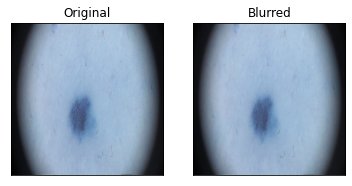

In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

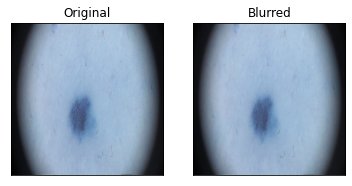

In [97]:
img = cv2.imread('/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

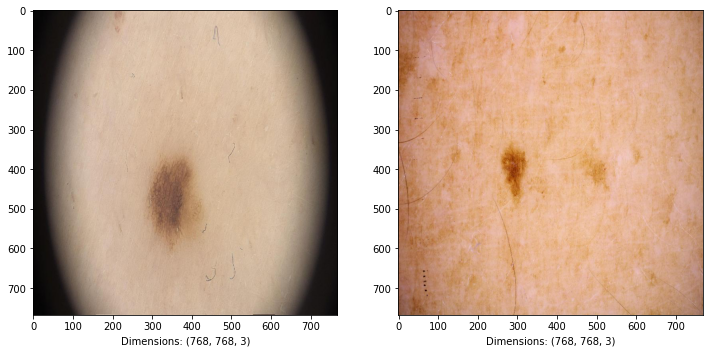

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(isic_test[0])
plt.xlabel("Dimensions: "+str(np.array(isic_test[0]).shape))
plt.subplot(1,2,2)
plt.imshow(isic_train[0], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(isic_train[0]).shape))
plt.show()

In [103]:
!pip install dask_ml

     |████████████████████████████████| 143 kB 4.5 MB/s eta 0:00:01


In [104]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [105]:
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=1)
client

Client Scheduler: tcp://127.0.0.1:36843 Dashboard: http://127.0.0.1:43571/status,Cluster Workers: 4 Cores: 4 Memory: 16.00 GiB


In [113]:
import dask.array as da
from dask_ml.datasets import make_classification


n, d = 100000, 100

X, y = make_classification(n_samples=n, n_features=d,
                           chunks=n // 10, flip_y=0.2)
X

dask.array<normal, shape=(100000, 100), dtype=float64, chunksize=(10000, 100), chunktype=numpy.ndarray>

In [114]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

dask.array<concatenate, shape=(90000, 100), dtype=float64, chunksize=(9000, 100), chunktype=numpy.ndarray>

In [ ]:
threshold_value = 0.75 * da.max(isic_test).compute()
print(threshold_value)

In [ ]:
threshold_image = isic_test > threshold_value
plt.imshow(threshold_image, cmap='gray')

In [ ]:
label_image, num_labels = dask_image.ndmeasure.label(threshold_image)